In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
df = pd.read_csv("L2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
(df.corr(numeric_only=True))

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


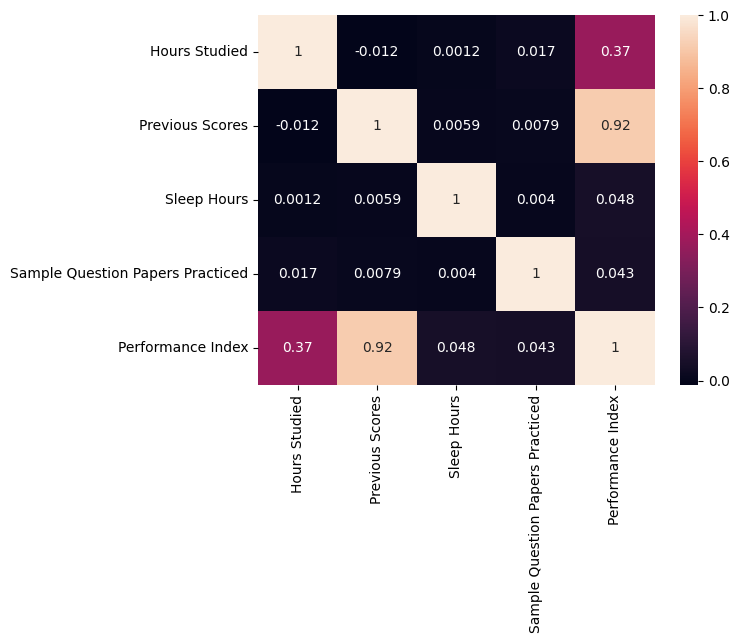

In [ ]:
sns.heatmap(
                df.corr(numeric_only=True),
                annot=True
)
plt.show()

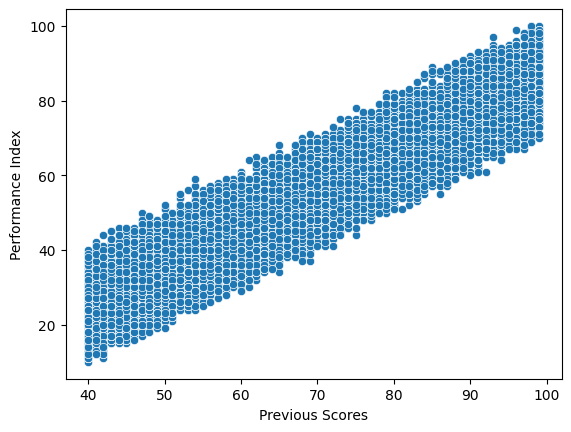

In [ ]:
sns.scatterplot(
                    x = df['Previous Scores'],
                    y = df['Performance Index'],
                    data = df
)
plt.show()

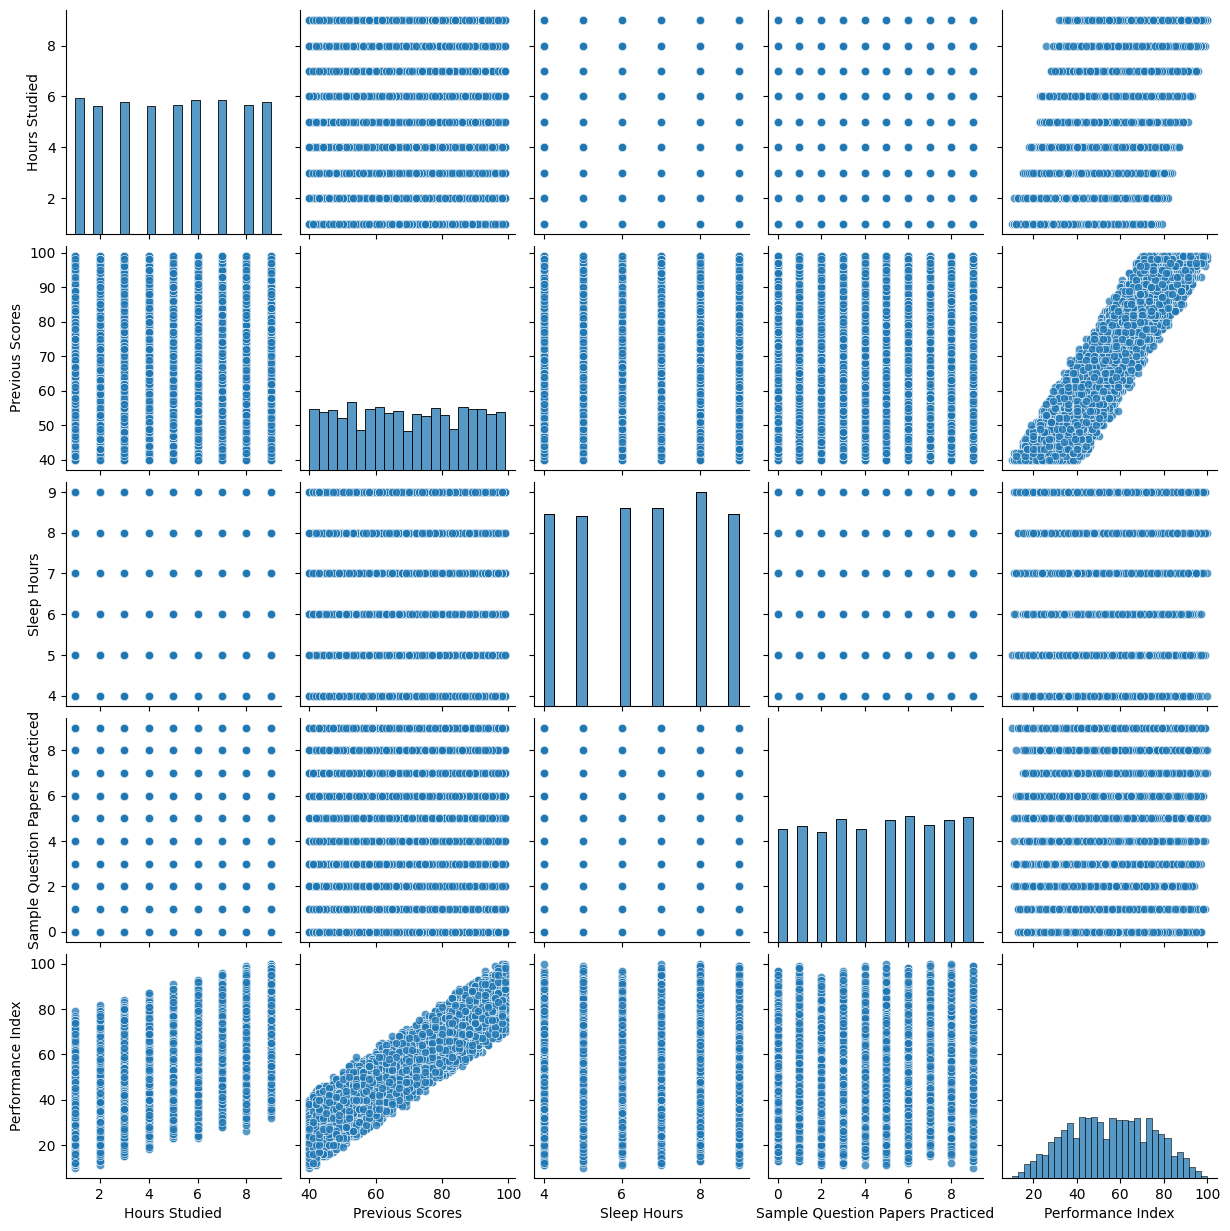

In [ ]:
sns.pairplot(df,kind='scatter',plot_kws={"alpha": 0.75})
plt.show()

The above graph shows that the dataset is synthetic and there is almost negligibe amount of randomness and error found here.
Data too clean to be analyzed , some sort of underlying formula is present to contribute to performance index . This is why we get a pefect model coming along .

In [ ]:
X = df[['Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']]
y = df['Performance Index']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)
y_predictions = model.predict(X_test)
residual = y_test - y_predictions

In [ ]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score
print(root_mean_squared_error(y_test,y_predictions))
print(mean_absolute_error(y_test,y_predictions))
print(r2_score(y_test,y_predictions))

6.4740023016417366e-15
3.85351010360561e-15
1.0


### After a Lot of Analysis the dataset was found to be too perfect and synthetic .


<hr>
Note : A lot of steps are missing here but I scanned and found that the dataset was synthetic , so I assumed it was a waste of time .
This is because in real world no data is non-random and without outliers .
There always exists some randomness and never linear ( If so is rare and may be found in small datasets and datasets with few variables ).
<hr>